In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report


In [4]:

df = pd.read_csv('spam mail.csv', encoding='latin-1')
df = df[['Category', 'Messages']]  
df.columns = ['Category', 'Messages']  


In [6]:

print("Class distribution:")
print(df['Category'].value_counts())
print("\nSample messages:")
print(df['Messages'].head())


Class distribution:
Category
ham     4825
spam     747
Name: count, dtype: int64

Sample messages:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Messages, dtype: object


In [7]:

df['label'] = df['Category'].map({'ham': 0, 'spam': 1})


In [9]:

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['Messages'])
y = df['label']


In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

nb = MultinomialNB()
nb.fit(X_train, y_train)


MultinomialNB()

In [12]:

y_pred = nb.predict(X_test)


In [13]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



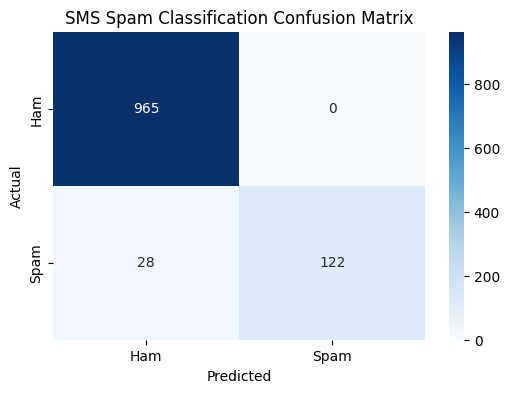

In [14]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SMS Spam Classification Confusion Matrix')
plt.show()
